<h1 style='font-size:3rem;color:red;'>STATISTICAL CLIMATOLOGY</h1>

## For Accra

In [7]:
# importing libriaries
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import numpy as np
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr
import pandas as pd

In [2]:
# assigning data to variables and also select location at the same time
gauge_data = xr.open_dataset('2.Accra_gauge_redate.nc').precip.sel(lon=-0.19,lat=5.6)
satellite_data_A = xr.open_dataset('Accra_SatA_redate.nc').pre.sel(lon=-0.19,lat=5.6)
satellite_data_B = xr.open_dataset('Accra_SatB_redate.nc').precip.sel(lon=-0.19,lat=5.6)

In [3]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error

# Defining a function to calculate relative error
def relative_error(true_value, measured_value):
    true_value = pd.Series(true_value)
    measured_value = pd.Series(measured_value)
    absolute_error = np.abs(true_value - measured_value)  # Calculating absolute error
    true_value_nonzero = true_value.replace(0, np.nan)  # Replacing zero with NaN to avoid division by zero
    relative_error = (absolute_error / np.abs(true_value_nonzero)) * 100  # Calculating relative error as a percentage
    return relative_error.fillna(0)  # Replacing NaN values with 0

# Defining a function to calculate absolute error
def absolute_error(true_value, measured_value):
    return np.abs(true_value - measured_value)  # Calculating the absolute difference

# Calculating RMSE for Satellite A
rmse_A = np.sqrt(mean_squared_error(gauge_data, satellite_data_A))
# Calculating RMSE for Satellite B
rmse_B = np.sqrt(mean_squared_error(gauge_data, satellite_data_B))

# Calculating correlation coefficients
corr_coef_A = np.corrcoef(gauge_data, satellite_data_A)[0, 1]
corr_coef_B = np.corrcoef(gauge_data, satellite_data_B)[0, 1]

# Calculating relative error for Satellite A
rel_error_A = relative_error(gauge_data, satellite_data_A)
# Calculating relative error for Satellite B
rel_error_B = relative_error(gauge_data, satellite_data_B)

# Calculating absolute error for Satellite A
abs_error_A = absolute_error(gauge_data, satellite_data_A).values
# Calculating absolute error for Satellite B
abs_error_B = absolute_error(gauge_data, satellite_data_B).values

# Compiling errors and accuracies into a dictionary for easy access
errors_and_accuracies = {
    'Satellite A': {
        'RMSE': rmse_A,  # Root Mean Square Error (mm/month)
        'Correlation Coefficient': corr_coef_A,  # Correlation Coefficient
        'Relative Error': rel_error_A.mean(),  # Average Relative Error (%)
        'Absolute Error': abs_error_A.mean()  # Average Absolute Error (mm)
    },
    'Satellite B': {
        'RMSE': rmse_B,  # Root Mean Square Error (mm/month)
        'Correlation Coefficient': corr_coef_B,  # Correlation Coefficient
        'Relative Error': rel_error_B.mean(),  # Average Relative Error (%)
        'Absolute Error': abs_error_B.mean()  # Average Absolute Error (mm)
    }
}

# Printing the errors and accuracies for each satellite with green and bold formatting
for satellite, metrics in errors_and_accuracies.items():
    print(f"\nMetrics for {satellite}:")
    print(f"\033[1;32mRMSE: [{metrics['RMSE']} mm/month]\033[0m")  # Printing RMSE with unit
    print(f"\033[1;32mCorrelation Coefficient: [{metrics['Correlation Coefficient']}]\033[0m")  # Printing Correlation Coefficient
    print(f"\033[1;32mAverage Relative Error: [{metrics['Relative Error']} %]\033[0m")  # Printing Average Relative Error with unit
    print(f"\033[1;32mAverage Absolute Error: [{metrics['Absolute Error']} mm]\033[0m")  # Printing Average Absolute Error with unit

# Providing a recommendation based on the calculated metrics
if rmse_A < rmse_B:
    recommendation = "Satellite A has lower RMSE and higher correlation coefficient, indicating it may be more accurate."
elif rmse_A > rmse_B:
    recommendation = "Satellite B has lower RMSE and higher correlation coefficient, indicating it may be more accurate."
else:
    recommendation = "Both satellites are showing similar performance based on RMSE and correlation coefficient."

print(f"\n\033[1;32mRecommendation based on the results:\033[0m {recommendation}")



Metrics for Satellite A:
RMSE: [34.28715515136719 mm/month]
Correlation Coefficient: [0.9014303094376166]
Average Relative Error: [65.45340728759766 %]
Average Absolute Error: [24.90725326538086 mm]

Metrics for Satellite B:
RMSE: [31.92569351196289 mm/month]
Correlation Coefficient: [0.926011921892823]
Average Relative Error: [65.99833679199219 %]
Average Absolute Error: [24.778709411621094 mm]

Recommendation based on the results: Satellite B has lower RMSE and higher correlation coefficient, indicating it may be more accurate.


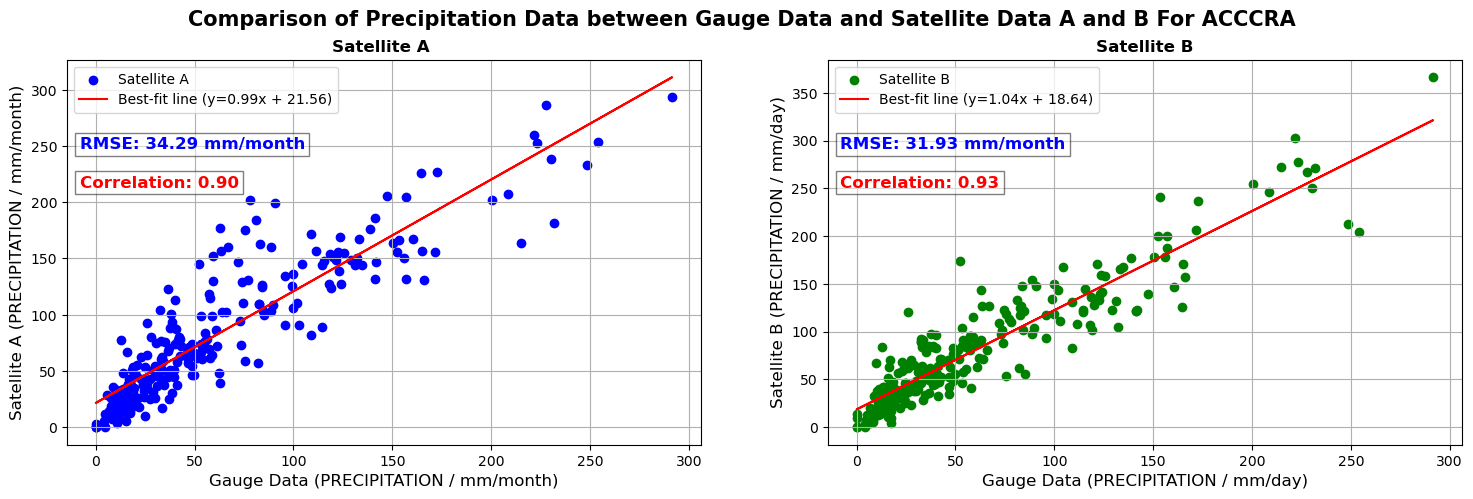

In [4]:
fig = plt.figure(figsize=(18, 5))

# spacing along width(left to right,)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.suptitle('Comparison of Precipitation Data between Gauge Data and Satellite Data A and B For ACCCRA', fontsize=15, fontweight='bold', color='black')

# Function to annotate plot with RMSE and correlation values
def annotate_plot(ax, rmse, corr, rmse_color='black', corr_color='black', x=0.02, y=0.8, bbox_color='white'):

        # Convert rmse and corr to scalars
    rmse = rmse.item()
    corr = corr.item()
    
    rmse_text = f"RMSE: {rmse:.2f} mm/month"
    corr_text = f"Correlation: {corr:.2f}"
    ax.text(x, y, rmse_text , transform=ax.transAxes, fontsize=12, fontweight='bold', 
            verticalalignment='top', bbox=dict(facecolor=bbox_color, alpha=0.5, pad=3), color='blue')
    ax.text(x, y - 0.1, corr_text, transform=ax.transAxes, fontsize=12, fontweight='bold', 
            verticalalignment='top', bbox=dict(facecolor=bbox_color, alpha=0.5, pad=3), color='red')

# Plot 1
ax = fig.add_subplot(1, 2, 1)
ax.scatter(gauge_data, satellite_data_A, color='blue', label='Satellite A')
ax.set_xlabel('Gauge Data (PRECIPITATION / mm/month)', fontweight='medium',fontsize=12)
ax.set_ylabel('Satellite A (PRECIPITATION / mm/month)', fontweight='medium',fontsize=12)
ax.set_title('Satellite A ', fontweight='bold',fontsize=12)
ax.grid(True)

# Plot best-fit line
m, b = np.polyfit(gauge_data.values.flatten(), satellite_data_A.values.flatten(), 1)
plt.plot(gauge_data, m*gauge_data + b, color='red', label=f'Best-fit line (y={m:.2f}x + {b:.2f})')

# Annotate plot with RMSE and correlation values
annotate_plot(ax, rmse_A, corr_coef_A, rmse_color='green', corr_color='blue')

plt.legend()

# Plot 2
ax1 = fig.add_subplot(1, 2, 2)
ax1.scatter(gauge_data, satellite_data_B, color='green', label='Satellite B')
ax1.set_xlabel('Gauge Data (PRECIPITATION / mm/day)', fontweight='medium',fontsize=12)
ax1.set_ylabel('Satellite B (PRECIPITATION / mm/day)', fontweight='medium',fontsize=12)
ax1.set_title('Satellite B', fontweight='bold',fontsize=12)
ax1.grid(True)

# Plot best-fit line
m, b = np.polyfit(gauge_data.values.flatten(), satellite_data_B.values.flatten(), 1)
plt.plot(gauge_data, m*gauge_data + b, color='red', label=f'Best-fit line (y={m:.2f}x + {b:.2f})')

# Annotate plot with RMSE and correlation values at custom position
annotate_plot(ax1, rmse_B, corr_coef_B, rmse_color='orange', corr_color='purple')

plt.legend()
plt.savefig('1.all_ACCRA.png', dpi=500)
plt.show()

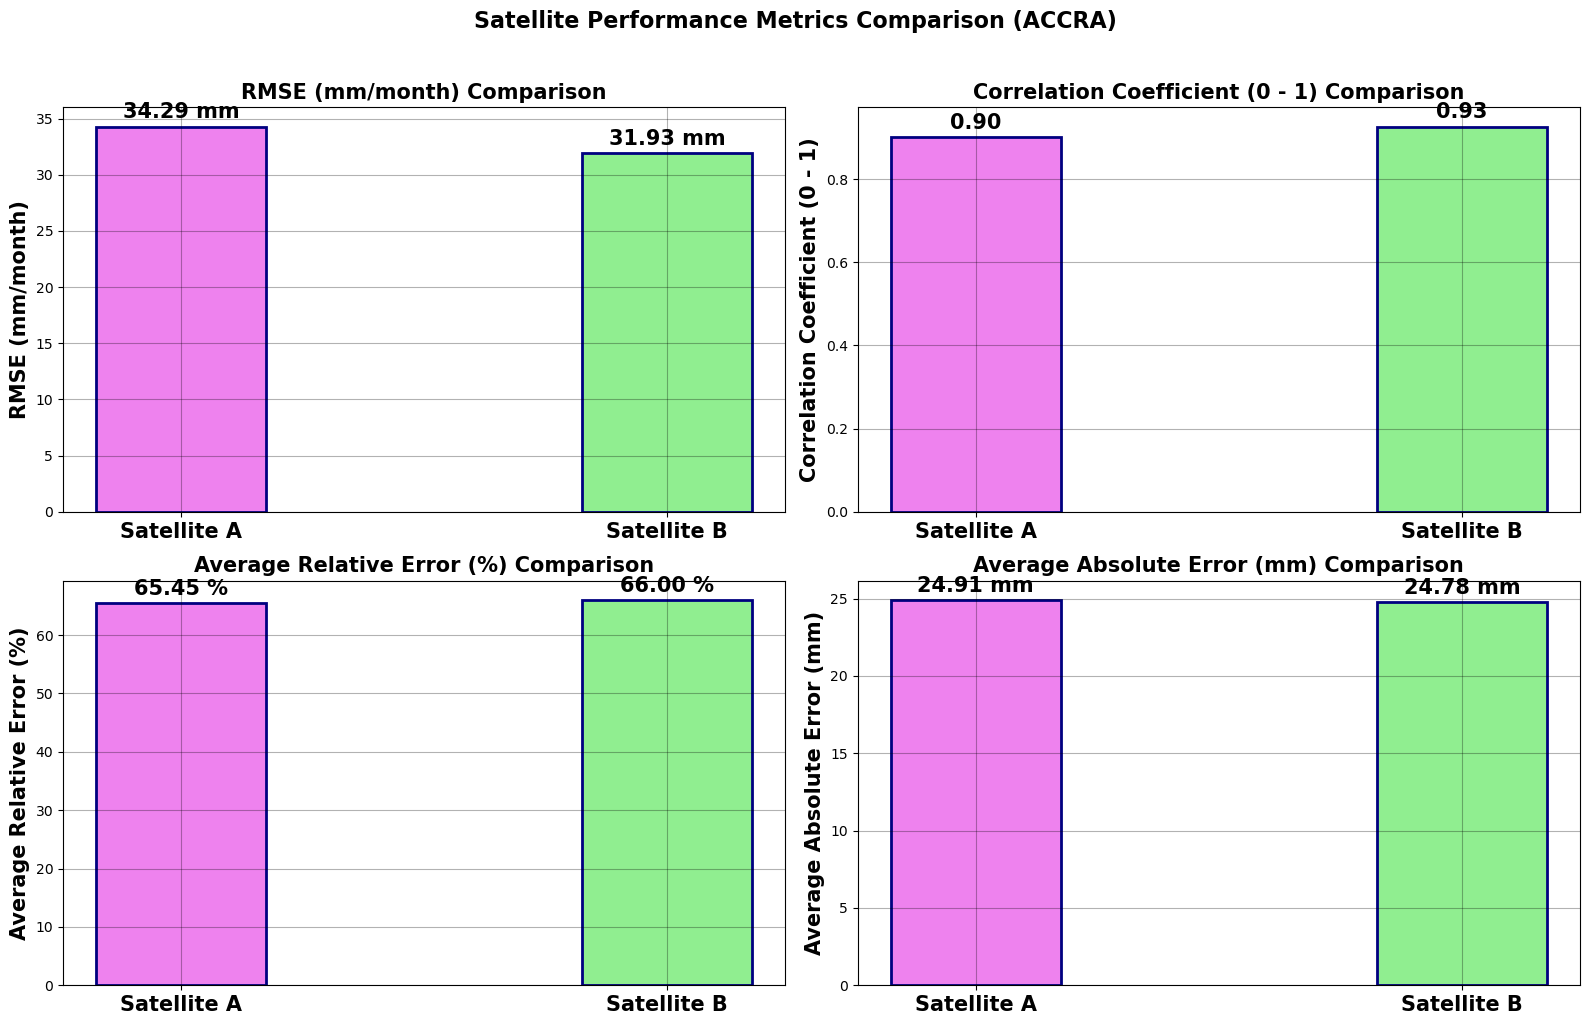

In [9]:
# Metrics setup
metrics_names = ['RMSE (mm/month)', 'Correlation Coefficient (0 - 1)', 'Average Relative Error (%)', 'Average Absolute Error (mm)']
satellite_names = ['Satellite A', 'Satellite B']
metrics_values = {
    'RMSE (mm/month)': [rmse_A, rmse_B],
    'Correlation Coefficient (0 - 1)': [corr_coef_A, corr_coef_B],
    'Average Relative Error (%)': [np.mean(rel_error_A), np.mean(rel_error_B)],
    'Average Absolute Error (mm)': [np.mean(abs_error_A), np.mean(abs_error_B)]
}


# Creating bar plots
fig, axes = plt.subplots(2, 2, figsize=(16, 10))  # Adjusting the figure size to accommodate a 2x2 grid of subplots

colors = ['violet', 'lightgreen']
bar_width = 0.35  # Defining the width of each bar

# Flattening the axes array for easier iteration
axes = axes.flatten()

# Looping through each metric to create bar plots
for i, metric in enumerate(metrics_names):
    ax = axes[i]
    values = metrics_values[metric]
    x = np.arange(len(satellite_names))  # x-axis positions for bars
    bars = ax.bar(x, values, color=colors, width=bar_width, edgecolor='navy', linewidth=2)  # Adding black edge color to bars
    ax.set_ylabel(metric, fontweight='bold', fontsize=15)
    ax.set_title(f'{metric} Comparison', fontweight='bold', fontsize=15)
    ax.set_xticks(x)  # Setting x-axis ticks to correspond to satellite names
    ax.set_xticklabels(satellite_names, fontweight='bold', fontsize=15)  # Setting x-axis labels to satellite names

    # Annotating bar values with units
    for j, bar in enumerate(bars):
        height = bar.get_height()
        unit = ''  # Default unit is empty
        if 'RMSE' in metric or 'Absolute Error' in metric:
            unit = ' mm'
        elif 'Relative Error' in metric:
            unit = ' %'
        ax.annotate(f'{height:.2f}{unit}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),  # x and y positions
                    xytext=(0, 3),  # Offset for text
                    textcoords="offset points",  # Offset relative to the point
                    ha='center', va='bottom',  # Horizontal and vertical alignment
                    fontweight='bold', fontsize=15)  # Making the annotation bold

    # Adding gridlines and spines
    ax.grid(True, linestyle='-', alpha=0.3, color ='black')


# Beautifying the plot
plt.suptitle('Satellite Performance Metrics Comparison (ACCRA)', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()

# Saving or showing the plot
plt.savefig('2.ACCRA_satellite_performance_comparison.png', bbox_inches='tight',dpi=500)
plt.show()

<BarContainer object of 21 artists>

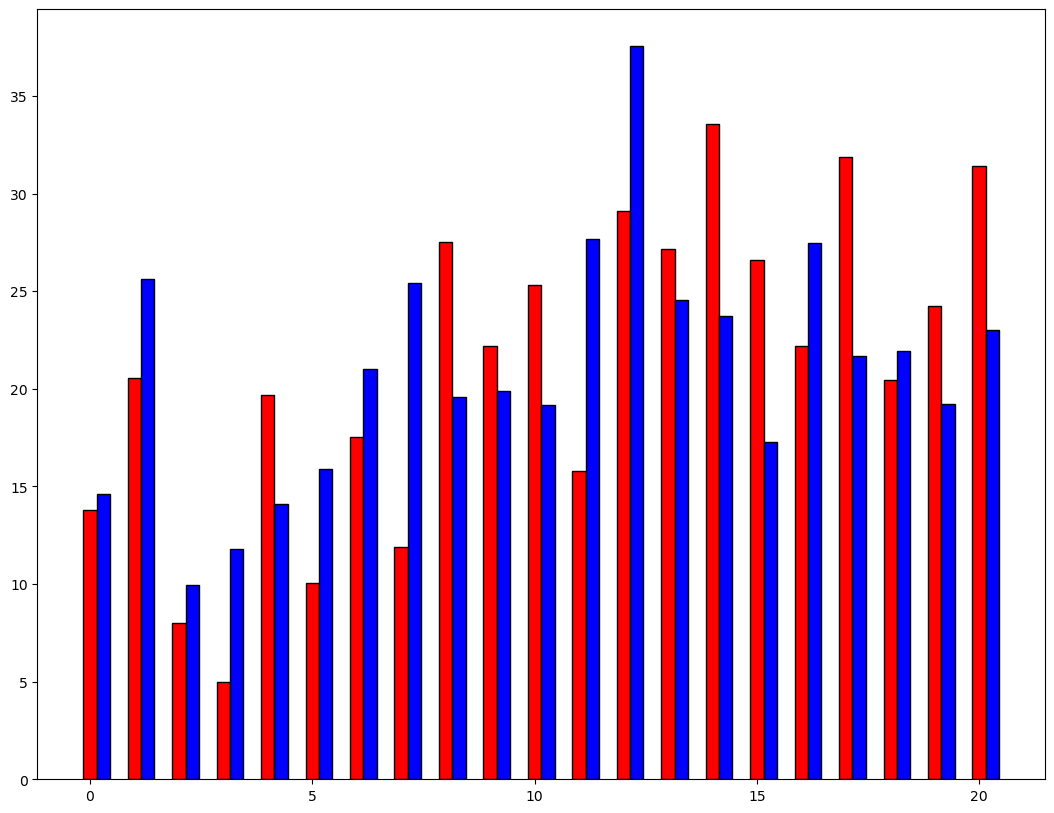

In [36]:
x= (satellite_data_A - gauge_data).groupby('time.year').mean().to_series().reset_index()
y= (satellite_data_B - gauge_data).groupby('time.year').mean().to_series().reset_index()


barwidth = 0.3
fig = plt.subplots(figsize = (13,10))

bar1 = np.arange(len(x.year))
bar2 = [x + barwidth for x in bar1] 

plt.bar(bar1, x[0], color = 'r', width = barwidth, edgecolor = 'black', label = 'CMIP_6 MODULE')     
plt.bar(bar2, y.precip, color = 'b', width = barwidth, edgecolor = 'black', label = 'GAUGE_DATA')   